In [1]:
%matplotlib inline
import numpy as np
import os
from matplotlib import pyplot as plt

import pickle
import torch

import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12.5}

matplotlib.rc('font', **font)

In [2]:
basepath = "/home/mccrinbc/"
foldernames = [ #'results_TBI_model-End-2020-10-05-11',
                #'results_TBI_model-End-2020-10-21-18',
                #'results_TBI_model-End-2020-10-22-16',
                #'results_TBI_model-End-2020-10-22-17',
                #'results_TBI_model-End-2020-10-22-18', 
                #'results_TBI_model-End-2020-10-22-19',
                #'results_TBI_model-End-2020-10-22-20',
                #'results_TBI_model-End-2020-10-23-18-41',
                #'results_TBI_model-End-2020-10-23-19-10',
                #'results_TBI_model-End-2020-10-23-19-32',
                #'results_TBI_model-End-2020-10-23-20-14'
                #'results_TBI_model-End-2020-10-26-9-50',
                #'results_TBI_model-End-2020-10-26-10-31',
                #'results_TBI_model-End-2020-10-26-11-51',
                #'results_TBI_model-End-2020-10-26-12-35',
                #'results_TBI_model-End-2020-10-27-15-59',
                #'results_TBI_model-End-2020-10-28-16-57',
                #'results_TBI_model-End-2020-10-28-17-16',
                #'results_TBI_model-End-2020-10-30-11-52',
                #'results_TBI_model-End-2020-10-30-12-19',
                #'results_TBI_model-End-2020-10-30-12-46',
                #'results_TBI_model-End-2020-10-30-13-13',
                #'results_TBI_model-End-2020-10-30-14-20',
                #'results_TBI_model-End-2020-10-30-14-47',
                #'results_TBI_model-End-2020-10-30-15-14',
                #'results_TBI_model-End-2020-11-02-11-15',
                #'results_TBI_model-End-2020-11-02-11-41',
                #'results_TBI_model-End-2020-11-02-12-14',
                #'results_TBI_model-End-2020-11-02-13-3',
                #'results_TBI_model-End-2020-11-02-13-26',
                #'results_TBI_model-End-2020-11-03-11-37',
                #'results_TBI_model-End-2020-11-03-12-1',
                #'results_TBI_model-End-2020-11-03-13-57',
                #'results_TBI_model-End-2020-11-03-14-18',
                #'results_TBI_model-End-2020-11-03-15-57',
                #'results_TBI_model-End-2020-11-03-16-13',
                #'results_TBI_model-End-2020-11-04-14-18',
    
                #'results_TBI_model-End-2020-11-04-14-34',
                #'results_TBI_model-End-2020-11-04-14-49',
                #'results_TBI_model-End-2020-11-04-15-5',
                #'results_TBI_model-End-2020-11-04-15-20',
                #'results_TBI_model-End-2020-11-04-15-36',
                'results_TBI_model-End-2020-11-04-15-51',
                #'results_TBI_model-End-2020-11-04-16-6',
    
                'results_TBI_model-End-2020-11-05-10-42',
                'results_TBI_model-End-2020-11-05-11-18',
                #'results_TBI_model-End-2020-11-05-11-38',
                #'results_TBI_model-End-2020-11-21-16-35',
                #'results_TBI_model-End-2020-11-21-17-58',
                #'results_TBI_model-End-2020-11-21-18-9',
                #'results_TBI_model-End-2020-11-21-18-22',
                #'results_TBI_model-End-2020-11-22-15-16',
                #'results_TBI_model-End-2020-11-22-15-33',
                #'results_TBI_model-End-2020-11-22-15-52',
    
                #'results_TBI_model-End-2020-11-24-11-39',
                #'results_TBI_model-End-2020-11-24-12-6',
                #'results_TBI_model-End-2020-11-24-12-35',
                #'results_TBI_model-End-2020-11-24-12-52'
               ]




In [3]:
data = {}
for ii, folder in enumerate(foldernames):
    testDataPath = os.path.join(basepath, folder,"test_results.pkl")
    
    with open(testDataPath,'rb') as f:  
        ENCODER, EPCOHS, lr_final, TPR_list, FPR_list, precision, thresholds, best_acc_thresh, IoUs, Dice, BCE = pickle.load(f)
    
    data[ii] = [ENCODER, EPCOHS, lr_final, TPR_list, FPR_list, precision, thresholds, best_acc_thresh, IoUs, Dice, BCE]
    #data[ii] = [TPR_list, FPR_list, precision, thresholds, best_acc_thresh, IoUs, Dice]

In [4]:
with open('/home/mccrinbc/models_Dice_seed_1021.pkl','rb') as f:  
    means, medians = pickle.load(f)

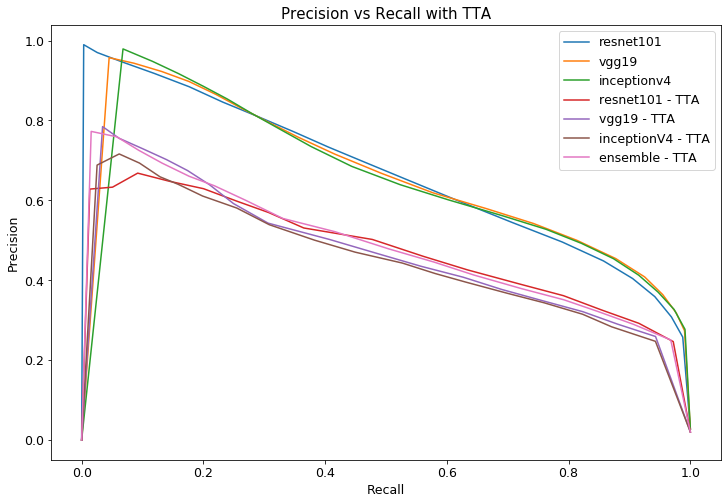

In [32]:
#Precision vs Recall. Caluclating F1 Score. 
plt.figure(1,figsize=(12,8))
thresh_index = 15
legend = []
ensemble_P = []
ensemble_R = []
for ii in range(len(data)): 
    data[ii][5][-1] = 0 #fixing the last datapoint due to error in calculation (= 1 for revision) 
    #ensemble_P.append(data[ii][5])
    #ensemble_R.append(data[ii][3])
    
    plt.plot(data[ii][3], data[ii][5])
    
    #plt.plot(data[ii][3][thresh_index],data[ii][5][thresh_index],'ro')
    #legend.append(data[ii][0] + ' / ' + str(data[ii][1]))
    legend.append(data[ii][0])

plt.plot(medians[0][:,2], medians[0][:,1])
legend.append('resnet101 - TTA')
plt.plot(medians[1][:,2], medians[1][:,1])
legend.append('vgg19 - TTA')
plt.plot(medians[2][:,2], medians[2][:,1])
legend.append('inceptionV4 - TTA')
plt.plot(medians[3][:,2], medians[3][:,1])
legend.append('ensemble - TTA')
#legend.append('Medians')
#plt.plot(recall_means, precision_means)
#legend.append('Means')

plt.title('Precision vs Recall with TTA')#. Thresh = ' + str(data[0][6][thresh_index]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(legend)

plt.savefig('/home/mccrinbc/AbstractImages/precision-recall-tta.png', format='png')

In [6]:
print(recall_medians)
print('')
print(precision_medians)

NameError: name 'recall_medians' is not defined

<ipython-input-7-91d72880c4d5>:7: RuntimeWarning: invalid value encountered in true_divide
  F1 = (2*data[ii][3]*data[ii][5]) / (data[ii][3] + data[ii][5])


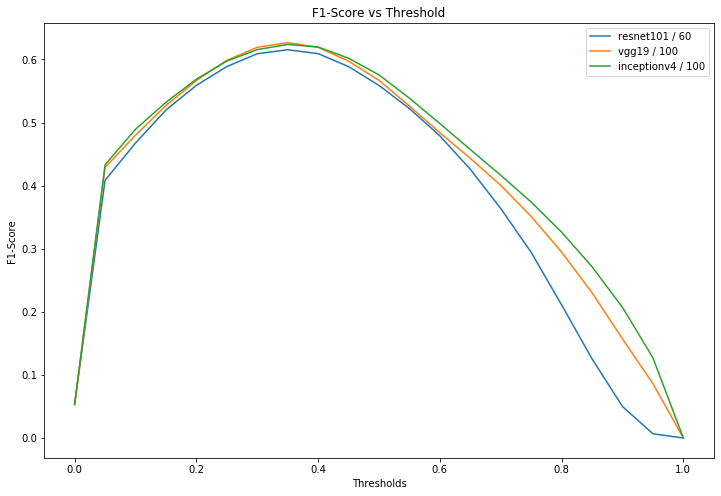

In [7]:
#Plotting the Harmoic Mean of the Precision and Recall (F1-Score)
#Precision vs Recall. Caluclating F1 Score. Looks identical to Dice. 
plt.figure(1,figsize=(12,8))
thresh_index = 15
legend = []
for ii in range(len(data)): 
    F1 = (2*data[ii][3]*data[ii][5]) / (data[ii][3] + data[ii][5])
    F1 = np.nan_to_num(F1, nan = 0)
    plt.plot(data[ii][6], F1)
    #plt.plot(data[ii][3][thresh_index],data[ii][5][thresh_index],'ro')
    legend.append(data[ii][0] + ' / ' + str(data[ii][1]))
    
plt.title('F1-Score vs Threshold')#. Thresh = ' + str(data[0][6][thresh_index]))
plt.xlabel('Thresholds')
plt.ylabel('F1-Score')
plt.legend(legend)


In [8]:
medians[0]

array([[0.03951713, 0.02015686, 1.        ],
       [0.38712139, 0.24639303, 0.97187077],
       [0.43911119, 0.29216902, 0.9153778 ],
       [0.4704374 , 0.32515524, 0.85482856],
       [0.49845526, 0.36131293, 0.7915433 ],
       [0.50656323, 0.39063243, 0.71919279],
       [0.51498683, 0.42588065, 0.63387525],
       [0.51473679, 0.45986265, 0.56117246],
       [0.49533388, 0.50203414, 0.47758361],
       [0.44072252, 0.53076831, 0.36490591],
       [0.3866192 , 0.56948474, 0.3071493 ],
       [0.34405289, 0.59764864, 0.2554152 ],
       [0.30938898, 0.6290933 , 0.20028895],
       [0.23771446, 0.64751509, 0.14463931],
       [0.16253083, 0.66804264, 0.09208653],
       [0.09284225, 0.63294085, 0.05078326],
       [0.0263846 , 0.62812428, 0.01345733],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [9]:
num = 1
prec_recall_thresh = abs(data[num][5] - data[num][3])[0:-2]
optimal_index = np.where(prec_recall_thresh == np.min(prec_recall_thresh))
optimal_prec_rec_thresh = data[num][6][optimal_index][0]
print(optimal_prec_rec_thresh)

0.45


Optimal Threshold:  0.45
Test Loss at Thresh:  0.6071355862249971


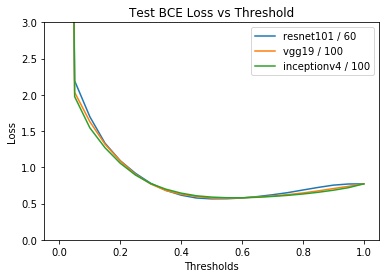

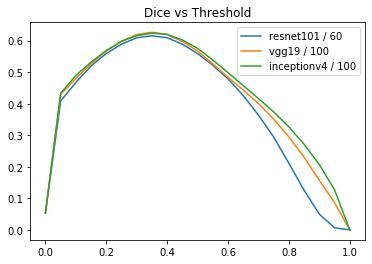

In [10]:
#Test Weighted BCE Loss is the mean of the set of mean losses on each batch. 
#example: 20 batches, 20 mean losses, average losses into single number for 1 threshold, do for x thresholds. 
plt.figure(0)
legend = []
for ii in range(len(data)):
    plt.plot(data[ii][6],data[ii][-1])
    legend.append(data[ii][0] + ' / ' + str(data[ii][1]))
plt.title('Test BCE Loss vs Threshold')
plt.xlabel('Thresholds')
plt.ylabel('Loss')
plt.ylim([0,3])
plt.legend(legend)

plt.figure(2)
plt.title('Dice vs Threshold')
legend = []
for ii in range(len(data)):
    plt.plot(data[ii][6],data[ii][-2])
    legend.append(data[ii][0] + ' / ' + str(data[ii][1]))
    
plt.legend(legend)

test_loss_at_optimal_threshold = data[ii][-1][np.where(data[ii][6] == optimal_prec_rec_thresh)[0][0]]
print('Optimal Threshold: ', optimal_prec_rec_thresh)
print('Test Loss at Thresh: ', test_loss_at_optimal_threshold)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


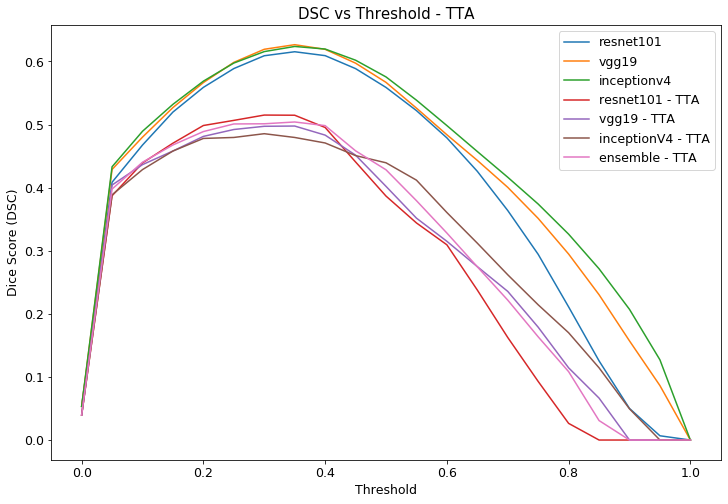

In [27]:
plt.figure(1, figsize=(12,8))
plt.title('DSC vs Threshold - TTA')
legend = []
for ii in range(len(data)):
    plt.plot(data[ii][6],data[ii][-2])
    #legend.append(data[ii][0] + ' / ' + str(data[ii][1]))
    legend.append(data[ii][0])
        
plt.plot(data[ii][6], medians[0][:,0])
plt.plot(data[ii][6], medians[1][:,0])
plt.plot(data[ii][6], medians[2][:,0])
plt.plot(data[ii][6], medians[3][:,0])
#legend.append('Ensemble Dice Means')
legend.append('resnet101 - TTA')
legend.append('vgg19 - TTA')
legend.append('inceptionV4 - TTA')
legend.append('ensemble - TTA')
plt.legend(legend)
plt.xlabel('Threshold')
plt.ylabel('Dice Score (DSC)')

plt.savefig('/home/mccrinbc/AbstractImages/Dice_threshold_tta.png', format='png')

In [ ]:
medians.shape

In [ ]:
ii

In [ ]:
a = a > 0.3
b = b > 0.3

In [ ]:
a.dtype

In [ ]:
a.shape

In [ ]:
predictions = a.float()
labels = b.float()

In [ ]:
print(a)
print(b)

In [ ]:
def Weights(labels, device):
    #expects an [batch_size,c,n,n] input 
    
    weights = torch.rand(labels.shape) #create a random tensor of weight values. 
    weights = weights.to(device) #put everything onto the GPU. 
    
    for batch_num in range(0,labels.shape[0]):
        num_ones = torch.sum(labels[batch_num,0,:,:]);
        resolution = labels.shape[2] * labels.shape[3]
        num_zeros = resolution - num_ones 
        
        #https://discuss.pytorch.org/t/how-to-apply-a-weighted-bce-loss-to-an-imbalanced-dataset-what-will-the-weight-tensor-contain/56823/2
        #Weight for the positive class
        pos_weight = num_zeros / resolution #should be close to 1.
        neg_weight = 1 - pos_weight 
        
        #create 1s tensor, put to GPU.
        ones = torch.ones(labels.shape[2],labels.shape[3])
        ones = ones.to(device)
        
        weights[batch_num,0,:,:] = ones*neg_weight + labels[batch_num,0,:,:]*pos_weight
        
    #this keeps the clas imbalance in check
    return weights

In [ ]:
loss_function = torch.nn.BCELoss(reduction = 'mean')

In [ ]:
weights = Weights(labels,'cpu') #generate the weights for each slice in the batch
loss_function.pos_weight = weights                    
                
#Implementing BCE Loss
loss = loss_function(predictions, labels) #loss changes here. 

In [ ]:
loss

In [ ]:
mapping = {}
mapping['train'] = {'set': [1,2,3,4,5]}

In [ ]:
mapping

In [ ]:
mapping['train']['set']

In [ ]:
from PIL import Image
img = Image.open('/home/mccrinbc/Registered_Brains_FA/normalized_slices/FA_8999_norm_0122.tif')
dtype = {'F': np.float32, 'L': np.uint8}[img.mode]
np_img = np.array(img.getdata(), dtype=dtype)
w, h = img.size
np_img.shape = (h, w, np_img.size // (w * h))
print(np_img)


In [ ]:
a = torch.rand(1,3,3)
b = torch.nn.functional.interpolate(a, size = [10,10], mode = 'bicubic')

In [ ]:
b.shape

In [ ]:
b